In [1]:
import numpy as np
from PIL import Image
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
# Function to load and preprocess a single example
def preprocess_example(img_path):
    input_image = np.array(Image.open(img_path)) / 255.0
    return np.expand_dims(input_image, axis=0)

In [3]:
img_path = "./../Data50_res256_filtered_20/validate/sat/sat_N-33-60-D-d-1-2_02_01.tif"
model_path = "./../Model/model_unet_noClassWeights_drop50_256_30_0.972.keras"
# Load the model
model = keras.models.load_model(model_path)

# Load and preprocess input image
input_image = preprocess_example(img_path)

# Predict with the model
predictions = model.predict(input_image)
predicted_mask = np.argmax(predictions[0], axis=-1)




1/1 [==============================] - 1s 632ms/step


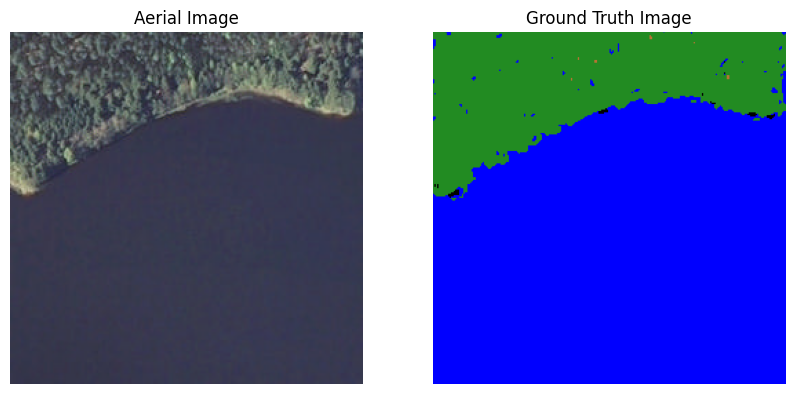

In [10]:
# Define colors for each class
class_colors = {
    0: (0, 0, 0),        # unlabeled
    1: (255, 0, 0),      # buildings
    2: (34, 139, 34),    # woodlands
    3: (0, 0, 255),      # water
    4: (184, 115, 51)    # road
}

# Load images
sat_image = Image.open(img_path)

# Convert ground truth image to numpy array
pred_array = np.array(predicted_mask)

# Apply color mapping
pred_colored = np.zeros(pred_array.shape + (3,), dtype=np.uint8)
for class_label, color in class_colors.items():
    pred_colored[pred_array == class_label] = np.array(color)
    
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the aerial image on the left
axes[0].imshow(sat_image)
axes[0].set_title('Aerial Image')
axes[0].axis('off')

# Plot the ground truth image on the right
axes[1].imshow(pred_colored)
axes[1].set_title('Ground Truth Image')
axes[1].axis('off')

plt.show()

In [13]:
PIL_image = Image.fromarray(pred_colored.astype('uint8'), 'RGB')
PIL_image.save("pred_image.png")